# <p style="text-align: center;">Welcome to the DSBA / HCIP 6160 Final Project</p>

In this project, you'll be performing analysis using various different tools to stretch the skills that you developed in the first half of our course around joining datasets together while leveraging what we've been learning in the second half.  Specifically, we'll be working with the following:

* calling web APIs (new)
* working with semi-structured data and schemas (JSON)
* efficient querying (relational algebra)
* data wrangling (munging) and plotting results (data camp python/pandas courses and projects)

This notebook will guide you through the process after which you'll be able to answer the questions contained in the Final Project quiz.  First off, some description of how to work through this notebook:

* EXECUTE cells - these are cells below which I've setup for you and you must execute.  Note that they have EXECUTE commented in the first line.  Read the comments in each of these EXECUTE cell as some of them are changeable (i.e., configurations) while others are not
* TODO cells - these are cells in which you'll need to write some code in order to move forward in the notebook.  The preceding markdown comments and python comments should make it clear what needs to be done.
* Questions - questions which you'll need to answer in the Final Project Quiz on Canvas are bolded below.  My suggestion would be for you to work through the entire lab and capture your answers to these questions as you go.  
* Final Project Quiz - You will only have one attempt at the Final Project Quiz however you will have unlimited time so once you submit, you will have completed the Final Project.
* Final Project Notebook Submission - you'll need to submit your final notebook via Canvas.  Please be sure to _save_ your final version (see Save icon in menu above) when you're all done and certainly between sessions as you work on it.

I've set this notebook up to be self-describing - explaining pieces as you go - however if you run into questions or issues or if it's ever unclear what you're supposed to be doing, please post your question in the Piazza forums.

Let's get started!  First, you'll need to execute the following code block to load up all of the Python packages and modules that we'll need for this project.

In [1]:
# EXECUTE - do not change
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas_datareader as pdr
from pandas_datareader import wb
import json

Most of the packages above should be familiar.  The only exception is pandas_datareader which we'll use to interface with the World Bank's World Development Indicators and whose documentation you can find here:

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#world-bank

True to what you've learned in Data Camp, you can often find helper libraries/packages like pandas_datareader which can make your work a lot easier.  We'll leverage the **wb** module in pandas_datareader to download global domestic product (GDP) and populaton data for all countries between 1980 and 2018.  pandas_datareader abstracts away the dirty details around how to interface with the World Bank APIs which is a huge benefit.  If you don't want to build a tool from scratch, by all means don't.  :D

Before we get to pulling data, we're going to set some pandas configuration options.  

The first configuration below (**display.float_format**) sets floats to display with two decimal places.  The default is to display in scientific notation.  I've included the command to reset this option if you prefer scientific notation (see pd.reset_option code after end of line comment).

The second set of configurations which control how much DataFrame data is displayed default can be set by uncommenting the appropriate line (rows or columns or both):

* **display.max_rows** - setting this option to None will enable viewing all rows without top/bottom row sampling in Jupyter.  Otherwise, you can set a specific number of rows
* **display.max_columns** - setting this option to None will enable viewing all columns without first/last column sampling in Jupyter.  Otherwise, you can set a specific number of rows.

I'm also setting a path variable specific to the Apporto environment.  More on this later, but you'll use this to define the path to various files.

You can come back up to this cell and re-run at anytime in order to update the effective configurations.

In [2]:
# EXECUTE - you can change some of the options below depending upon your preferences

#set floats to display full value to left of decimal with 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)        # undo:pd.reset_option('display.float_format')

#uncomment these configuration if desired
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

#setup path variable
path = '/Users/jackphillips/Downloads/'

Now let's dive in!  Review the code in the cell below.

We are using the wb module provided by the pandas_datareader package to download data from the World Bank.  The indicator (NY.GDP.MKTP.KD) specifies the data element in which we're interested - in this case annual GDP figures by country over time in constant 2010 US dollars.  The country argument specifies that we want all countries returned.  The start/end arguments specify the time window that we'd like for our data download (1980-2018).

You can learn more about the annual GDP indicator below:
http://databank.worldbank.org/data/reports.aspx?source=2&type=metadata&series=NY.GDP.MKTP.KD

Go ahead and run the code below.  A few things to note

* a new gdp DataFrame is created by the call to wb.download()
* we're resetting the index to have a default zero-based index
* we're updating the column names so that the gdp field is easier to work with
* we're outputting the shape of the gdp DataFrame to get the number of records
* at any time, if you want to add your own cells to this notebook to explore, feel free to do so.  Just make sure that they execute successfully as we will be running your notebooks after you submit them.  In the menu above, select Insert > Insert Cell Above/Below and then type in your own Python.  Might be a good idea to explore this gdp DataFrame for a bit

In [86]:
# EXECUTE - do not change.  Later in this project, you'll replicate this logic for population data
gdp = wb.download(indicator='NY.GDP.MKTP.KD', country='all', start=1980, end=2018)
gdp = gdp.reset_index()
gdp.columns = ['country','year','gdp']
gdp.shape
gdp.count()


country    10296
year       10296
gdp         8773
dtype: int64

**Question 1: This dataset is large enough to produce some latency if we run it without specifying the years.  We're filtering our request down as early in the process as possible to ensure we only pull what we need for our analysis.  Doing this reduces the potential for data explosion in downstream joins.  What is this concept called in relational algebra terms?**

You've been provided with a countries dataset in Canvas named countries.csv which you should have copied with this notebook into your U:\ drive on your Apporto virtual.  You'll need to read this file into a new pandas DataFrame named **countries** which will be used later in this notebook.  

One important thing to note about reading in files to this notebook from your virtual is that you'll need to provide a proper path.  To save you guys some hassle, I've setup a variable in the configuration cell above named **path** which you can concatenate in front of your file name for any file reading operations.  So, if you have a file named abc.txt in your U:\ drive folder and you want to specify the full path to the file, you would do so as follows:

`path + 'abc.txt'`

You'll use this convention a few times in this notebook.  

Go ahead and import the countries.csv file into a new DataFrame named **countries**.  Set the index for countries to be the first column (country_code).  Review all fields included in your countries DataFrame.  Your new DataFrame should look like the following.

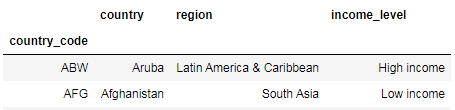

In [4]:
# TODO - import countries.csv into a dataframe named countries - set country_code to be the index

countries= pd.read_csv(path+'countries.csv', index_col='country_code')

# TODO - review the first few rows of data
countries.head()

,country,region,income_level
country_code,,,
ABW,Aruba,Latin America & Caribbean,High income
AFG,Afghanistan,South Asia,Low income
AFR,Africa,Aggregates,Aggregates
AGO,Angola,Sub-Saharan Africa,Lower middle income
ALB,Albania,Europe & Central Asia,Upper middle income


The data that we've pulled down from the World Bank into the gdp DataFrame does not contain country codes, unfortunately.  It _does_ contain country names which we can join to the country names in our countries DataFrame.  For this exercise, I want you to change the index on your countries DataFrame to be based upon country instead of the country_code.  But I want you to ensure that you don't drop the country_code.  

Below, you need to effectively flip the index on the countries DataFrame from being based upon the country_code to the country.  There are a couple of ways you can do this.  To be clear though, **I do NOT want you to re-read the CSV**.  You'll need to perform this in place without re-reading the source data.  Your DataFrame should like the following when complete:

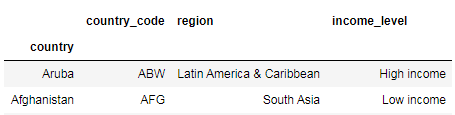

In [5]:
# TODO - flip the index on your countries DataFrame as described above  
countries.reset_index(inplace=True)
countries.set_index('country', inplace=True)

# TODO - Inspect your DataFrame and verify that it still contains country_code
countries.head()



,country_code,region,income_level
country,,,
Aruba,ABW,Latin America & Caribbean,High income
Afghanistan,AFG,South Asia,Low income
Africa,AFR,Aggregates,Aggregates
Angola,AGO,Sub-Saharan Africa,Lower middle income
Albania,ALB,Europe & Central Asia,Upper middle income


Inner join the countries DataFrame and the gdp DataFrame based upon country and assign the result to a new DataFrame named **gdpmerge**

In [6]:
# TODO - join countries and gdp on the country field and store in a new DataFrame called gdpmerge


gdpmerge=pd.merge(countries,gdp, on='country', how='inner')

Inspect the record counts in gdpmerge compared to the record count in gdp.  What happened?

In [7]:
# TODO - Inspect the number of records in gdpmerge
gdpmerge.count()


country         10218
country_code    10218
region          10218
income_level    10218
year            10218
gdp              8695
dtype: int64

Perform an outer join between countries and gdp and assign the results to a new dataframe named **gdpmerge_test**.  Inspect the counts and compare to the number of records which were pulled down from the World Bank.

In [8]:
# TODO - Perform an outer join between gdp and countries
gdpmerge_test=pd.merge(gdp,countries, how='outer', on='country')

# TODO - Inspect the number of records in gdpmerge
gdpmerge_test.count()


country         10338
year            10296
gdp              8773
country_code    10260
region          10260
income_level    10260
dtype: int64

**Question 2: There are two "countries" in particular which are causing issues.  Which are they?**

Latin America and Sub sahara aftria 




Use gdpmerge_test to show the rows which are not matching on country when joining gdp to countries

In [9]:
# TODO - show which "countries" aren't joining over properly


filtered=gdpmerge_test[pd.isnull(gdpmerge_test['country_code'])]
filtered.tail(60)


,country,year,gdp,country_code,region,income_level
837,Latin America & Caribbean,2000,3915382747614.45,NaN,NaN,NaN
838,Latin America & Caribbean,1999,3772342347332.37,NaN,NaN,NaN
839,Latin America & Caribbean,1998,3767350340112.20,NaN,NaN,NaN
840,Latin America & Caribbean,1997,3685165946001.77,NaN,NaN,NaN
841,Latin America & Caribbean,1996,3505271330214.07,NaN,NaN,NaN
842,Latin America & Caribbean,1995,3386116442070.42,NaN,NaN,NaN
843,Latin America & Caribbean,1994,3335467116190.31,NaN,NaN,NaN
844,Latin America & Caribbean,1993,3189297138868.44,NaN,NaN,NaN
845,Latin America & Caribbean,1992,3074124699241.67,NaN,NaN,NaN
846,Latin America & Caribbean,1991,2998361784441.27,NaN,NaN,NaN


**Question 3: These two "countries" aren't joining properly due to an issue in the source CSV.  I know, because I put it there (evil grin).  Open up countries.csv and figure out what's happening.  What's the problem?  This is a very common issue, by the way.**

spaces after the countries 

You _could_ fix this issue in the source CSV, but I want you to fix this issue in your existing countries DataFrame.  In order to do this, you'll need to apply a string function across all of the country values.  This is a little more complicated though because you're updating the index and not a regular column.

Fix the index on the countries DataFrame and then prove that it's fixed by recreating gdpmerge using an inner join of the gdp and countries DataFrames.

In [10]:
# TODO - fix the index on countries so that the two problem "countries" aren't problems anymore
countries.reset_index(inplace=True)
countries.head()
countries['country']=countries['country'].str.strip()
countries.set_index('country', inplace=True)
countries.head()
# TODO - re-merge the gdp and fixed countries DataFrames using an inner join and inspect the number of rows
gdpmerge=pd.merge(countries,gdp, on='country', how='inner')
gdpmerge.count()

country         10296
country_code    10296
region          10296
income_level    10296
year            10296
gdp              8773
dtype: int64

Now that you've fixed those pesky "countries" and the inner join is working properly, have a look at the merged data for the two "countries" which weren't matching originally (the ones you identified for Question 2).  Note the region and income_level values for them.  

In [11]:
# TODO - write code to inspect successfully merged rows for the two "countries" identified for Question 2
LA=gdpmerge[(gdpmerge['country']=='Latin America & Caribbean')]  
SA=gdpmerge[(gdpmerge['country']=='Sub-Saharan Africa')]

As you might have figured, these rows (along with a number of others) are not really countries but rather aggregations of countries.  We don't want these aggregate rows in our merged dataset.  Figure out a way to update your gdpmerge DataFrame so that they no longer exist. 

In [12]:
# TODO - write code to remove the aggregate rows from gdpmerge
gdpmerge=gdpmerge[(gdpmerge['region']!='Aggregates')]
gdpmerge=gdpmerge[(gdpmerge['income_level']!='Aggregates')]
gdpmerge.head(60)

,country,country_code,region,income_level,year,gdp
0,Aruba,ABW,Latin America & Caribbean,High income,2018,nan
1,Aruba,ABW,Latin America & Caribbean,High income,2017,2579895285.13
2,Aruba,ABW,Latin America & Caribbean,High income,2016,2546020205.29
3,Aruba,ABW,Latin America & Caribbean,High income,2015,2551409422.54
4,Aruba,ABW,Latin America & Caribbean,High income,2014,2562957745.21
5,Aruba,ABW,Latin America & Caribbean,High income,2013,2541400876.22
6,Aruba,ABW,Latin America & Caribbean,High income,2012,2439005748.52
7,Aruba,ABW,Latin America & Caribbean,High income,2011,2472880828.36
8,Aruba,ABW,Latin America & Caribbean,High income,2010,2390502793.30
9,Aruba,ABW,Latin America & Caribbean,High income,2009,2481963897.09


**Question 4: How many rows do you have now in gdpmerge?**

**Question 5: How many rows do you have in gdpmerge with null gdp values?**

In [13]:
# TODO - determine the number of rows in gdpmerge
gdpmerge.shape

(8463, 6)

In [14]:
# TODO - determine the number of rows with null GDP values
gdpmerge['gdp'].isnull().sum()

1400

As you should see, we have some null GDP values which you'll need to handle.  We'll make the assumption that these null GDP values can be set to 0

In [15]:
# TODO - update null gdp values with 0
gdpmerge=gdpmerge.fillna(0)


Run the following two tests against the gdp figures in your gdpmege DataFrame for confirmation before continuing any further:
* Test 1: 0
* Test 2: 1934688442343840.2

Execute the following two tests to ensure that you're still on track.  

In [16]:
# EXECUTE - Test 1 - compare output to value above
gdpmerge['gdp'].isna().sum()

0

In [17]:
# EXECUTE - Test 2 - compare output to value above
gdpmerge['gdp'].sum()

1934688442343840.2

The next thing that we'll want to do is start looking at GDP data for certain countries/regions for certain years.  Let's inspect gdpmerge to see what data types our DataFrame contains.

In [18]:
# TODO - Inspect the datatypes in gdpmerge
gdpmerge.dtypes

country          object
country_code     object
region           object
income_level     object
year             object
gdp             float64
dtype: object

The year field is still a string as noted by the 'object' data type. Convert the year field to an integer and then verify that the year field has been converted.  You should see the following (blacked out regions are hiding rowcounts which is the subject of Question 4):

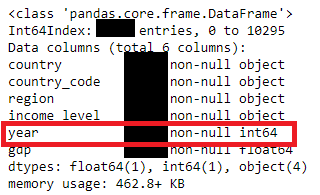

In [19]:
# TODO - convert the year field in gdpmerge to be an integer
gdpmerge['year']=gdpmerge['year'].astype(int)
gdpmerge.dtypes

country          object
country_code     object
region           object
income_level     object
year              int64
gdp             float64
dtype: object

Now figure out how many rows exist in gdpmerge for 2018

In [109]:
# TODO - Figure out how many rows we have in gdpmerge for 2018
gdpmerge2018=gdpmerge[(gdpmerge['year']==2018)]
gdpmerge2018.count()

country         217
country_code    217
region          217
income_level    217
year            217
gdp             217
dtype: int64

**Question 6: How many rows exist in gdpmerge for 2018?**

Now you'll start doing some analysis with your gdpmerge DataFrame.  Below you'll write code to rank order countries by their 2018 GDP and identify countries by specific rankings.  Ensure that your output is sorted such that these rankings are easy to identify.  You don't need to number the rows - hand-counting is fine.  Just make sure it's sorted properly.

**Question 7-9 - Which countries had the 1st, 3rd and 5th largest economies by GDP in 2018?**

In [21]:
# TODO - write code to order the countries in gdpmerge by their 2018 GDP in descending order
bycountry=gdpmerge2018.groupby(['country','gdp']).sum().sort_values(by='gdp', ascending=False)
bycountry

,,year
country,gdp,
United States,17844274747700.00,2018
China,10800568391746.10,2018
Japan,6189748011270.24,2018
Germany,3939226614470.55,2018
France,2924903217192.47,2018
...,...,...
French Polynesia,0.00,2018
Syrian Arab Republic,0.00,2018
Northern Mariana Islands,0.00,2018


Now you'll need to write code that will provided a sorted output of aggregate regional GDP for 2018 in order to identify specific regional rankings.

**Question 10-12 - Which region had the 1st, 3rd and 5th largest economies by GDP in 2018?**

In [126]:
# TODO - write code to order the regions by aggregate 2018 GDP in descending order
byregion=gdpmerge2018.groupby(['region','year']).sum().sort_values(by='gdp', ascending=False)
byregion.head(10)

,,gdp
region,year,
Europe & Central Asia,2018,24052263615478.35
East Asia & Pacific,2018,23290752130063.67
North America,2018,19748448554817.24
Latin America & Caribbean,2018,5582059459191.32
South Asia,2018,3429829653580.45
Middle East & North Africa,2018,2871267232171.03
Sub-Saharan Africa,2018,1774717898938.30


**Question 13-16 - Use the describe function to determine the following statistics for the countries in the 1st largest regional ecomony by GDP in 2018 (the region you specified for Question 10):**

* number of countries (count)
* average GDP for the region (mean) - approximate
* median GDP for the region (median) - approximate
* measure of variation in GDP for the region (std) - approximate



In [127]:
# TODO - write code to use the describe function to provide statistics 
#        about the countries within the 1st largest regional economy by GDP in 2018
gdpmerge2018[gdpmerge2018['region']=='Europe & Central Asia'].describe()


,year,gdp
count,58.00,58.00
mean,2018.00,414694200266.87
std,0.00,808518338577.99
min,2018.00,0.00
25%,2018.00,11678959827.66
50%,2018.00,62370665889.63
75%,2018.00,371066217005.53
max,2018.00,3939226614470.55


Now I want you to perform all of the steps above but for country population which we'll ultimately join up to the gdpmerge dataset which you've built so far.  Your first step will be to pull down population data for the same time period using the pandas_datareader package.

* pull the data down into a DataFrame named **pop**
* the indicator that you need to pull down is **SP.POP.TOTL**
* pull data for all countries similar to gdp
* pull data for the period 1980 - 2018 similar to gdp
* reset the index to have a default zero-based index
* rename the columns to be country / year / pop

Once you've pulled down the data, verify that you have the same number of records as you initially had for the gdp DataFrame.  Your final DataFrame should look like this:

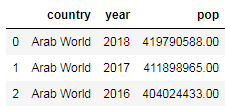

In [96]:
# TODO - pull down country population data using pandas_datareader and verify the shape similar to the code used above.
pop=wb.download(indicator='SP.POP.TOTL', start=1980, end=2018, country= 'all')
pop.reset_index(inplace=True)
pop.columns=['country','year','pop']
pop.shape


(10296, 3)

Merge your new pop DataFrame with the countries DataFrame into a new DataFrame named popmerge

In [98]:
# TODO - merge countries with pop on country into a new DataFrame named popmerge
popmerge=pd.merge(countries,pop, on='country', how='inner')

Verify that you're not losing any records due to bad country matches

In [103]:
# TODO - code up a check againt popmerge to ensure your merge executed as expected
popmerge.count()

country         10296
country_code    10296
region          10296
income_level    10296
year            10296
pop             10209
dtype: int64

Remove all aggregate rows from your popmerge dataset

In [104]:
# TODO - remove all aggregate rows from popmerge
popmerge=popmerge[(popmerge['region']!='Aggregates')]
popmerge=popmerge[(popmerge['income_level']!='Aggregates')]
popmerge.count()

country         8463
country_code    8463
region          8463
income_level    8463
year            8463
pop             8415
dtype: int64

Have a look at the records in popmerge that have a null value for pop

In [105]:
# TODO - inspect all rows in popmerge where pop is null
popmerge[(popmerge['pop'].isnull())]

,country,country_code,region,income_level,year,pop
2613,Eritrea,ERI,Sub-Saharan Africa,Low income,2018,nan
2614,Eritrea,ERI,Sub-Saharan Africa,Low income,2017,nan
2615,Eritrea,ERI,Sub-Saharan Africa,Low income,2016,nan
2616,Eritrea,ERI,Sub-Saharan Africa,Low income,2015,nan
2617,Eritrea,ERI,Sub-Saharan Africa,Low income,2014,nan
2618,Eritrea,ERI,Sub-Saharan Africa,Low income,2013,nan
2619,Eritrea,ERI,Sub-Saharan Africa,Low income,2012,nan
4899,Kuwait,KWT,Middle East & North Africa,High income,1994,nan
4900,Kuwait,KWT,Middle East & North Africa,High income,1993,nan
4901,Kuwait,KWT,Middle East & North Africa,High income,1992,nan


Earlier you made the assumption to set missing gdp values to zero however we won't do the same here for missing population values.  This is largely because we'll be calculating GDP per capita (GDP/pop) and could end up with division by zero errors.  Leaving them as null will result in null GDP per capita figures at the country level which is appropriate in this case.  In a real world scenario, you might also exclude these rows and document their exclusions with rationale (i.e., countries weren't in existence yet, data unknown, etc.) and look to update this data in the future.

Next, you'll want to check the data types on the fields in popmerge and ensure that the year field has the proper data type.

In [106]:
# TODO - inspect the popmerge data types
popmerge.dtypes

country          object
country_code     object
region           object
income_level     object
year             object
pop             float64
dtype: object

In [107]:
# TODO - update the year field to ensure it has the proper data type
popmerge['year']=popmerge['year'].astype(int)
popmerge.dtypes

country          object
country_code     object
region           object
income_level     object
year              int64
pop             float64
dtype: object

Now figure out how many rows exist in popmerge for 2018

In [108]:
# TODO - Figure out how many rows we have in popmerge for 2018
popmerge2018=popmerge[popmerge['year']==2018]
popmerge2018.count()

country         217
country_code    217
region          217
income_level    217
year            217
pop             216
dtype: int64

**Question 17: How many rows exist in popmerge for 2018?**

**Question 18 - 20 - Which countries had the 1st, 3rd and 5th largest populations in 2018?**

In [113]:
# TODO - write code to order the countries in popmerge by their 2018 populations in descending order
popmerge2018.groupby(['country','pop']).sum().sort_values(by='pop', ascending=False).head(10)

,,year
country,pop,
China,1392730000.00,2018
India,1352617328.00,2018
United States,327167434.00,2018
Indonesia,267663435.00,2018
Pakistan,212215030.00,2018
Brazil,209469333.00,2018
Nigeria,195874740.00,2018
Bangladesh,161356039.00,2018
Russian Federation,144478050.00,2018


**Question 21-23 - Which region had the 1st, 3rd and 5th largest populations in 2018?**

In [125]:
# TODO - write code to order the regions in popmerge by aggregate population in descending order
popmerge2018.groupby(['region','year']).sum().sort_values(by='pop', ascending=False).head(10)

,,pop
region,year,
East Asia & Pacific,2018,2304646596.00
South Asia,2018,1814388744.00
Sub-Saharan Africa,2018,1074853734.00
Europe & Central Asia,2018,918793590.00
Latin America & Caribbean,2018,641357515.00
Middle East & North Africa,2018,448912859.00
North America,2018,364290258.00


**Question 24-26 - Use the describe function to determine the following statistics for the countries in the 1st largest region by population in 2018 (the region you specified for Question 21):**

* average population for the region (mean) - approximate
* median population for the region (median) - approximate
* measure of variation in population for the region (std) - approximate

In [118]:
# TODO - write code to use the describe function to provide statistics 
#        about the countries within the 1st largest region by population in 2018
popmerge2018[popmerge2018['region']=='East Asia & Pacific'].describe()

,year,pop
count,37.00,37.00
mean,2018.00,62287745.84
std,0.00,230787124.57
min,2018.00,11508.00
25%,2018.00,165768.00
50%,2018.00,1267972.00
75%,2018.00,25549819.00
max,2018.00,1392730000.00


Join the full gdpmerge and popmerge DataFrames together into a new DataFrame named **gdppopmerge**.  There are a number of common fields between these two DataFrames.  Perform your own inspections to verify that no rows are dropped.

gdppopmerge should look like the following post-merge:

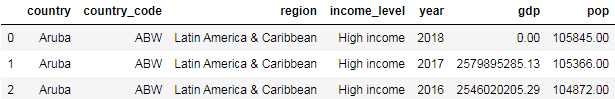

In [132]:
# TODO - perform merge of gdpmerge and popmerge DataFrames into new gdppopmerge DataFrame
gdppopmerge=pd.merge(gdpmerge,popmerge, on=['country','region','year','country_code','income_level'], how='inner')
gdppopmerge

,country,country_code,region,income_level,year,gdp,pop
0,Aruba,ABW,Latin America & Caribbean,High income,2018,0.00,105845.00
1,Aruba,ABW,Latin America & Caribbean,High income,2017,2579895285.13,105366.00
2,Aruba,ABW,Latin America & Caribbean,High income,2016,2546020205.29,104872.00
3,Aruba,ABW,Latin America & Caribbean,High income,2015,2551409422.54,104341.00
4,Aruba,ABW,Latin America & Caribbean,High income,2014,2562957745.21,103774.00
...,...,...,...,...,...,...,...
8458,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,1984,10821651138.62,8562249.00
8459,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,1983,11032072488.29,8254747.00
8460,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,1982,10859909746.20,7958241.00
8461,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,1981,10581170279.71,7675591.00


Add a new field to gdppopmerge called gdp_per_capital which performs the following computation at the country level, based upon the existing gdp and pop fields:

`gdp / pop`


In [134]:
# TODO - add new gdp_per_capital field which is gdp/pop
gdppopmerge['gdp_per_capital']=gdppopmerge['gdp']/gdppopmerge['pop']
gdppopmerge

,country,country_code,region,income_level,year,gdp,pop,gdp_per_capital
0,Aruba,ABW,Latin America & Caribbean,High income,2018,0.00,105845.00,0.00
1,Aruba,ABW,Latin America & Caribbean,High income,2017,2579895285.13,105366.00,24485.08
2,Aruba,ABW,Latin America & Caribbean,High income,2016,2546020205.29,104872.00,24277.41
3,Aruba,ABW,Latin America & Caribbean,High income,2015,2551409422.54,104341.00,24452.61
4,Aruba,ABW,Latin America & Caribbean,High income,2014,2562957745.21,103774.00,24697.49
...,...,...,...,...,...,...,...,...
8458,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,1984,10821651138.62,8562249.00,1263.88
8459,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,1983,11032072488.29,8254747.00,1336.45
8460,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,1982,10859909746.20,7958241.00,1364.61
8461,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,1981,10581170279.71,7675591.00,1378.55


**Question 27 - 29 - Which countries had the 1st, 3rd and 5th largest GDP Per Capita in 2018?**

In [139]:
# TODO - write code to order the countries in gdppopmerge by their 2018 GDP Per Capita in descending order
gdppopmerge2018=gdppopmerge[gdppopmerge['year']==2018]
gdppopmerge2018.groupby(['country']).sum().sort_values(by='gdp_per_capital', ascending=False).head(10)

,year,gdp,pop,gdp_per_capital
country,,,,
Luxembourg,2018,65174718234.08,607728.00,107243.24
Norway,2018,489564184707.02,5314336.00,92121.42
Switzerland,2018,671241684579.85,8516543.00,78816.22
Ireland,2018,373141461521.61,4853506.00,76880.81
Qatar,2018,175863478348.24,2781677.00,63222.11
Denmark,2018,364840483457.28,5797446.00,62931.24
Singapore,2018,328440881504.01,5638676.00,58247.87
"Macao SAR, China",2018,36669048541.37,631636.00,58054.08
Sweden,2018,582804342166.04,10183175.00,57232.09


**Question 30-32 - Which region had the 1st, 3rd and 5th largest GDP Per Capita in 2018?**

Note that while this can certainly be done with one long line of code, it may be more manageable to break this up into a series of intermediate steps.  Note, we are not specifying skipna parameter so null values are being omitted from population.

In [141]:
# TODO - write code to compute 2018 GDP Per Capita by region and then order results in descending order
gdppopmerge2018.groupby(['region','year']).sum().sort_values(by='gdp_per_capital', ascending=False).head(10)

,,gdp,pop,gdp_per_capital
region,year,,,
Europe & Central Asia,2018,24052263615478.35,918793590.00,1351686.48
East Asia & Pacific,2018,23290752130063.67,2304646596.00,457936.61
Middle East & North Africa,2018,2871267232171.03,448912859.00,300003.60
Latin America & Caribbean,2018,5582059459191.32,641357515.00,257194.28
Sub-Saharan Africa,2018,1774717898938.30,1074853734.00,113985.32
North America,2018,19748448554817.24,364290258.00,105924.14
South Asia,2018,3429829653580.45,1814388744.00,21039.19


Now, let's step back for a bit.  Let's say that we want to run some GDP Per Capita analysis on two different groups of countries:

Group 1: The top 10 2018 GDP Per Capita countries  (**Top10Group**)

Group 2: The following countries (**CustomGroup**)

* Denmark
* Ireland
* Luxembourg
* Macao SAR, China
* Norway
* Sweden
* United States

I want you to create a JSON file called **groups.json** which defines these two groups by providing an **array of country codes**.  You've been provided with a JSON schema called groups_schema.json which you can use to validate your JSON.  The online JSON Schema Validator here works well:

https://www.jsonschemavalidator.net/

Once you've determined that your JSON file is valid, place it in the same directory as this notebook (copy into the **U:\ drive** folder).  You'll likely need to use the Upload function for Apporto to upload the file to your Desktop and then copy it in.  The code below will create two new dataframes named df_top10 (Top10Group) and df_custom (CustomGroup) based upon your JSON file which you can then use to subset gdppopmerge.

In [143]:
# EXECUTE - do not change
with open(path + 'groups.json', 'r') as f:
    parsed_json = json.load(f)
    
df_top10 = pd.DataFrame(parsed_json['Top10Group'])
df_custom = pd.DataFrame(parsed_json['CustomGroup'])

df_top10.columns = ['country_code']
df_custom.columns = ['country_code']

KeyError: 'Top10Group'

Verify the contents of the DataFrames based upon your JSON

In [ ]:
# EXECUTE - inspect/verify df_top10 has the country codes for the Top 10 countries by 2018 GDP per Capita
df_top10

In [ ]:
# EXECUTE - inspect/verify df_custom has the custom country codes specified above
df_custom

Now we want to join up our gdppopmerge DataFrame with each one of our JSON-derived grouping DataFrames to build out some reporting.  Perform the inner joins indicated below and store the results in the new DataFrames indicated:

* gdppopmerge + df_top10 ==> gdppop_top10
* gdppopmerge + df_custom ==> gdppop_custom

In [ ]:
# TODO - create the two DataFrames indicated above using gdppopmerge and our new JSON-derived grouping DataFrames


**Question 33-34 - How many rows exist in gdppop_top10 and gdppop_custom, respectively?**

In [ ]:
# TODO - write code to determine number of rows in gdppop_top10


In [ ]:
# TODO - write code to determine number of rows in gdppop_custom


Now we're going to reshape these datasets for plotting purposes.  Reduce both gdppop_top10 and gdppop_custom down to only include the following columns:

* country
* year
* gdp_per_capita


In [ ]:
# TODO - write code to remove extraneous columns from gdppop_top100/gdppop_custom so that
#        only country, year and gdp_per_capita remain


Update the index on both  gdppop_top10 and gdppop_custom to be a multi-index based upon country and year.

In [ ]:
# TODO - write code to update the indexes on gdppop_top10 and gdppop_custom to be a multi-index
#        which includes country and year


Reshape both gdppop_top100 and gdppop_custom to make them shorter and wider by unstacking country from the row multi-index and moving it to the columns.  Assign these unstacked DataFrames to new variables named gdppop_top10_unstack and gdppop_custom_unstack, respectively.  The resulting DataFrames should look like the following with multi-level column labels (gdp_per_capita and country labels) and only year in row index:

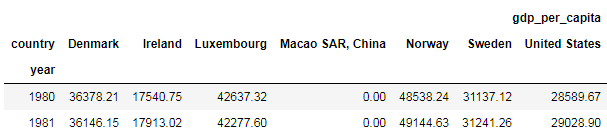

In [ ]:
# TODO - unstack country from gdppop_top10/gdppop_custom row index and assign resulting DataFrame
#        to gdppop_top10_unstack and gdp_custom_unstack, respectively


Note that we now have a multi-level labels on the columns now and we don't really need gdp_per_capita in it.  Explore the droplevel method on the DataFrame columns attribute to see how you can get rid of this so columns only have a single-level label based upon countries:

https://pandas-docs.github.io/pandas-docs-travis/reference/api/pandas.DataFrame.droplevel.html

In [ ]:
# TODO - Use the pandas DataFrame droplevel method to remove gdp_per_capita from the multi-level column labels
#       for both gdppop_top10_unstack and gdppop_custom_unstack


Now plot out GDP per capita over the full timeframe from each DataFrame

In [ ]:
# TODO - plot GDP per capita for the top 10 2018 GDP Per Capita country group over time (line plot)
#       be sure to add labels and a title to your plot


In [ ]:
# TODO - plot GDP per capita for the custom country group over time (line plot)
#       be sure to add labels and a title to your plot


Some interesting questions that you might want to dig into based upon this is what might be driving the sudden increase in GDP per capita in Ireland since ~2014.  Also, What happened with GDP per capita for Macao SAR China between 2009 and 2013 that led to such a sharp increase in GDP per capita which was followed by an equally sharp decline between 2013 and 2015.  And what is going on with Luxembourg?

* http://www.oecd.org/sdd/na/Irish-GDP-up-in-2015-OECD.pdf
* https://en.wikipedia.org/wiki/Economy_of_Macau
* https://prezi.com/jfnxqlhal3hk/why-is-luxembourgs-gdp-per-capita-so-high/

Congratulations!  You have reached the end of this notebook.  Now take all of the answers which you've gathered above and answer the quiz questions out on Canvas.